Exploratory Data Analysis 
car sales in The U.S.A

Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")
sns.set_style()

Data Extraction and First look

In [5]:
data = pd.read_csv("car_prices.csv")
df = pd.DataFrame(data)

In [6]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Data Info and Understanding

In [7]:
df.shape

(558837, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


Data Cleaning and Handeling missing values and Normalization data

In [10]:
# percentage of missing values
df.isnull().sum()/df.count()*100

year             0.000000
make             1.877908
model            1.896112
trim             1.942954
body             2.418252
transmission    13.242956
vin              0.000716
state            0.000000
condition        2.160810
odometer         0.016823
color            0.134208
interior         0.134208
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

!!! As the "output 13" displays , there are some missing values in the data set ,mostly in transmission column.
Due to the American consumer which usually perfer automatic transmission to manual transmission , this report is  filling the  missing values in transmission column with "automatic" !!!
Other column have the percentage of missing values something between 1 % to 5 % <===

In [11]:
df["transmission"].fillna("automatic",inplace=True)

In [12]:
df.dropna(axis=0, inplace=True)

checking again

In [13]:
df.isnull().sum()/df.count()*100


year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

Missing values have been successfully removed !

Now converting year column which is int type to date time data type ===> 
Also for sale date column ===>

In [14]:
df["year"] = pd.to_datetime(df["year"], format= "%Y").dt.year

In [15]:
df["saledate"] = pd.to_datetime(df["saledate"], utc=True, format="mixed").dt.date

In [16]:
df["color"].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

chanaging value "-" to Something meaningful ===>

In [17]:
df["color"] = df["color"].replace("—", "multicolor")


In [18]:
df["interior"].unique()

array(['black', 'beige', 'tan', 'brown', 'gray', '—', 'burgundy', 'white',
       'silver', 'off-white', 'red', 'yellow', 'green', 'purple', 'blue',
       'orange', 'gold'], dtype=object)

chanaging value "-" to Something meaningful ===>

In [19]:
df["interior"] = df["interior"].replace("—", "interior")

Now having a look to new data

In [20]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18


Data Visualization 


Making a function to creating count plot

In [21]:
def count_plot(col, label, rotation=0, size=(12,6)):
  
    
    plt.figure(figsize=size)
    plt.title(f'Count by Car {label}', fontsize=20)
    sns.countplot(x=data[col], palette='viridis')
    plt.xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    plt.ylabel('Count', fontsize=16)



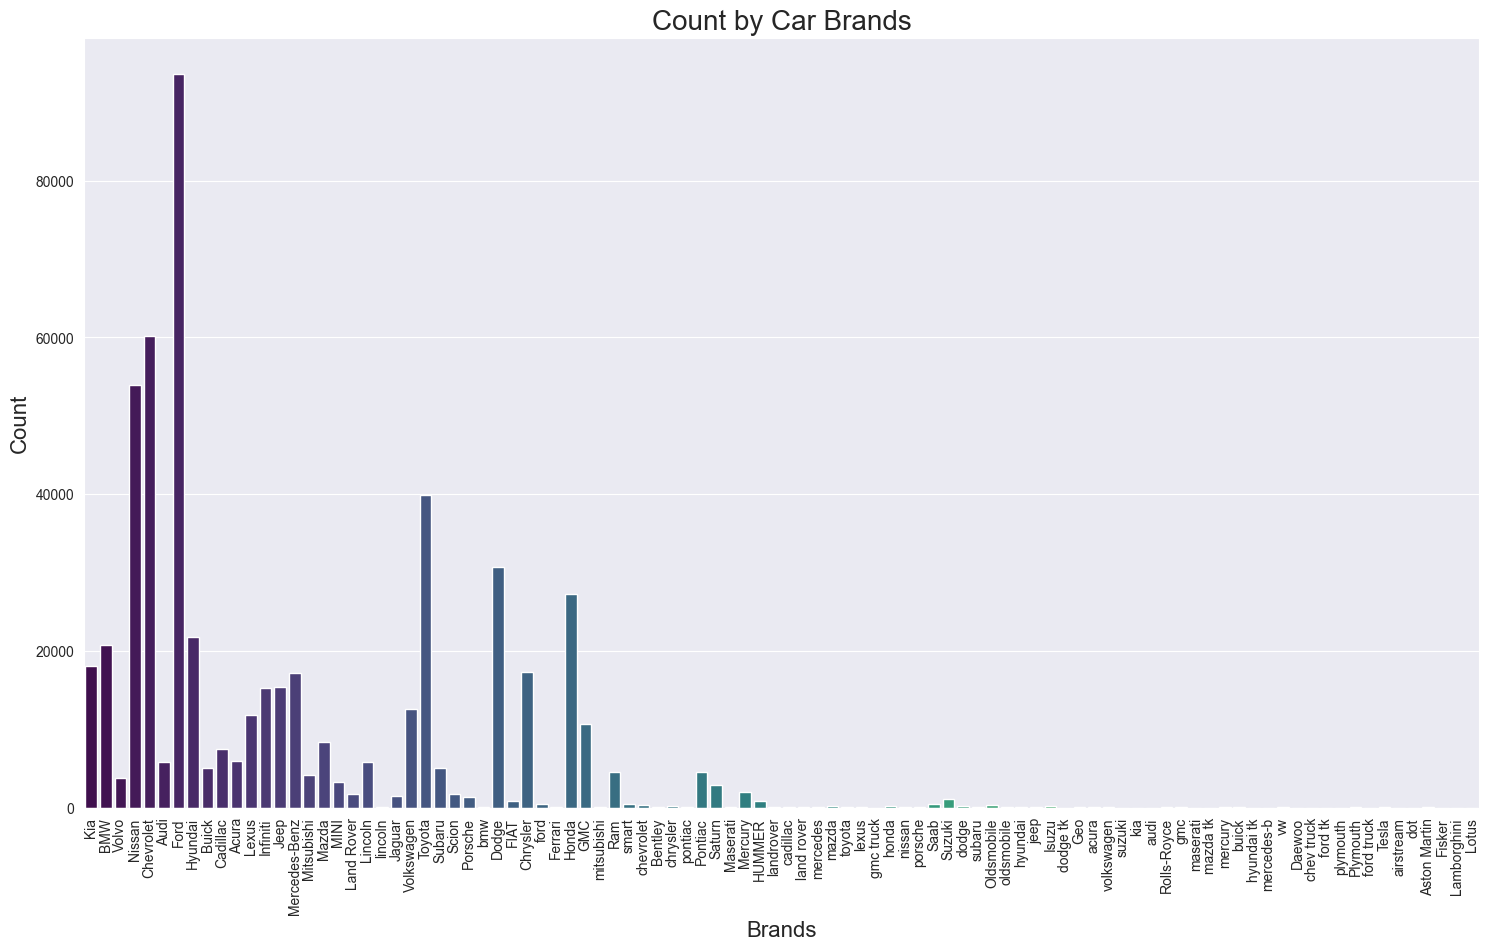

In [22]:
count_plot("make", "Brands", 90, (18,10))




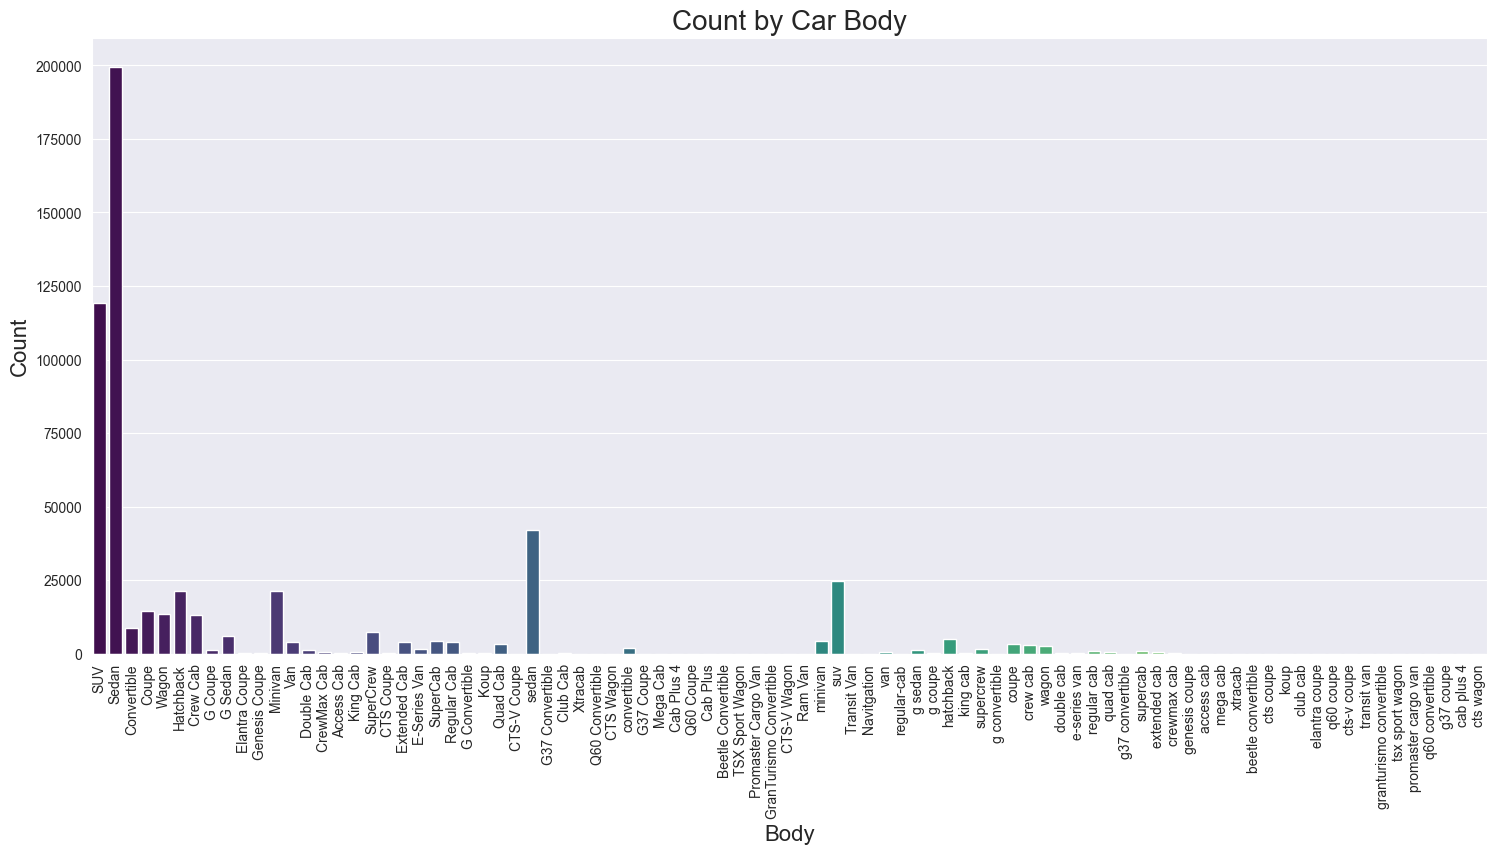

In [23]:
count_plot("body", "Body", 90, (18,8))

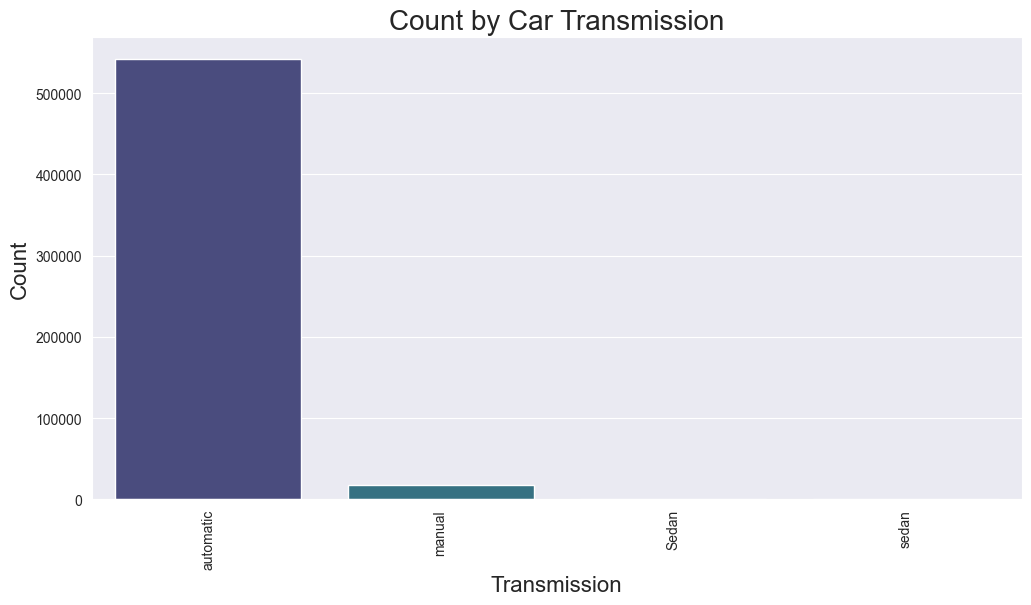

In [25]:
count_plot("transmission", "Transmission",90)

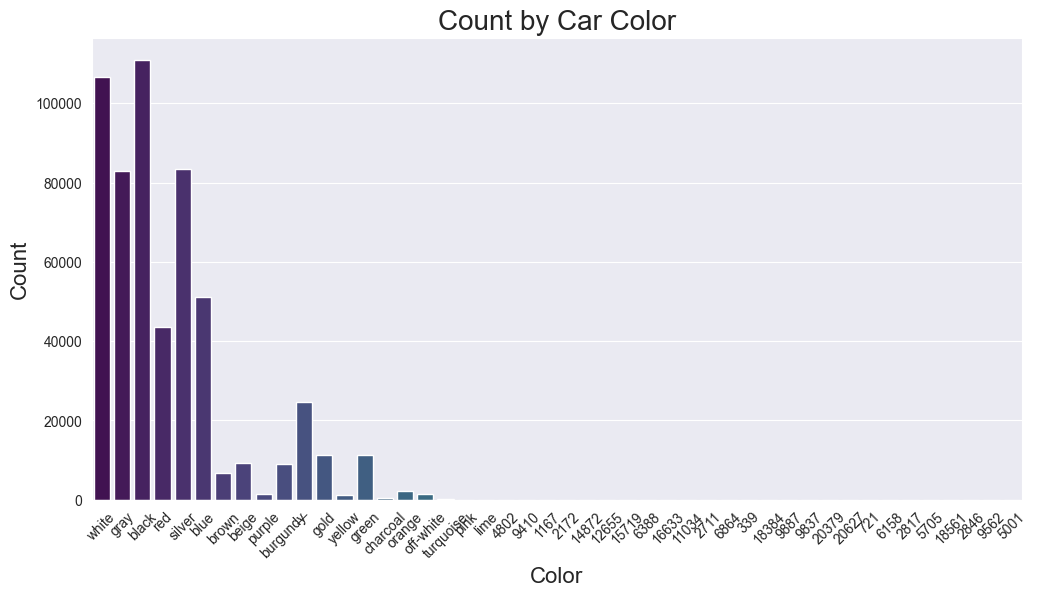

In [26]:
count_plot("color", "Color", 45)

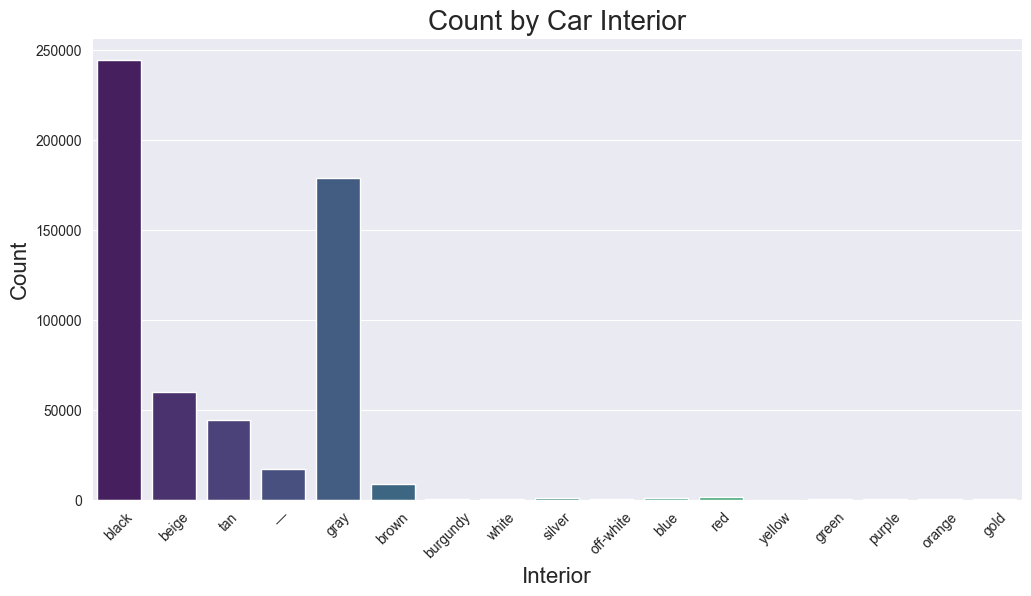

In [27]:
count_plot("interior", "Interior", 45)

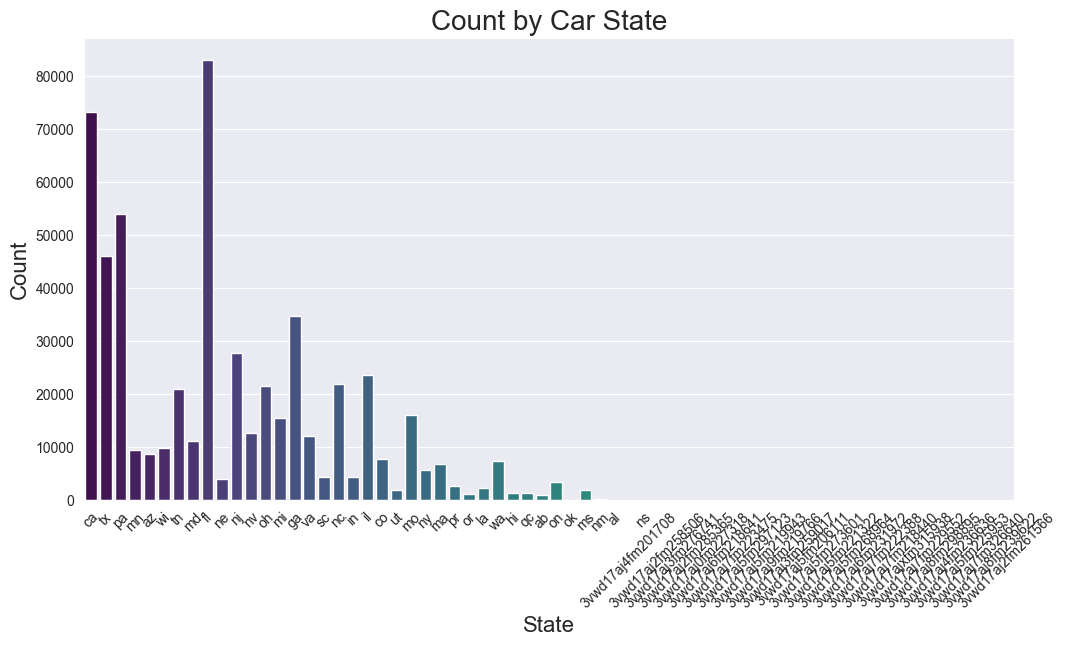

In [28]:
count_plot("state", "State", 45)

In [39]:
def box_plot(col, label):
    plt.figure(figsize=(10,6))
    sns.boxplot(data[col], palette="viridis")
    plt.title(label, fontsize=20)
    plt.ylabel(label, fontsize=16)

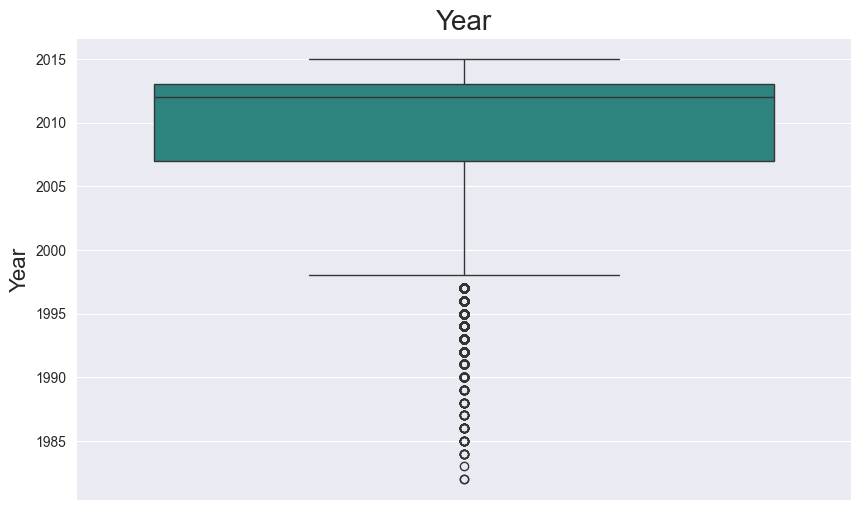

In [40]:
box_plot("year", "Year")

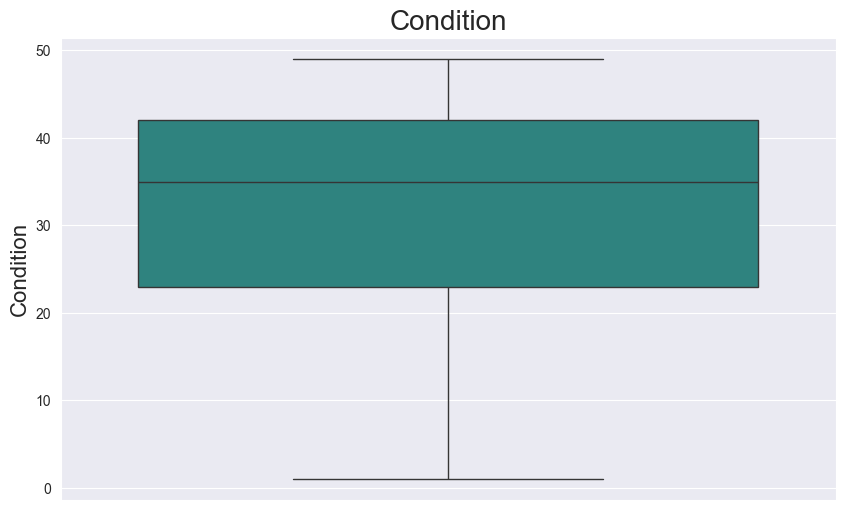

In [31]:
box_plot("condition", "Condition")

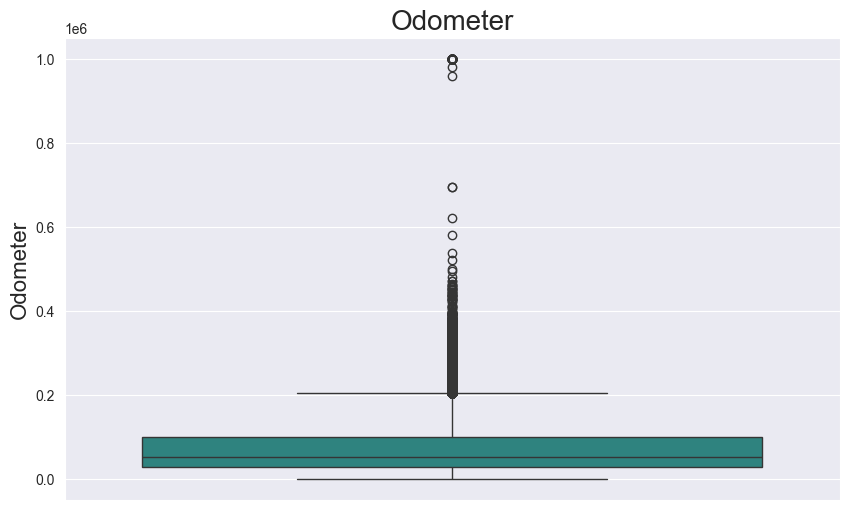

In [32]:
box_plot("odometer", "Odometer")

In [36]:
def histo_plot(col, label):
    plt.figure(figsize=(10,6))
    sns.histplot(data[col], palette="viridis")
    plt.title(label, fontsize=20)
    plt.xlabel(label, fontsize=16)

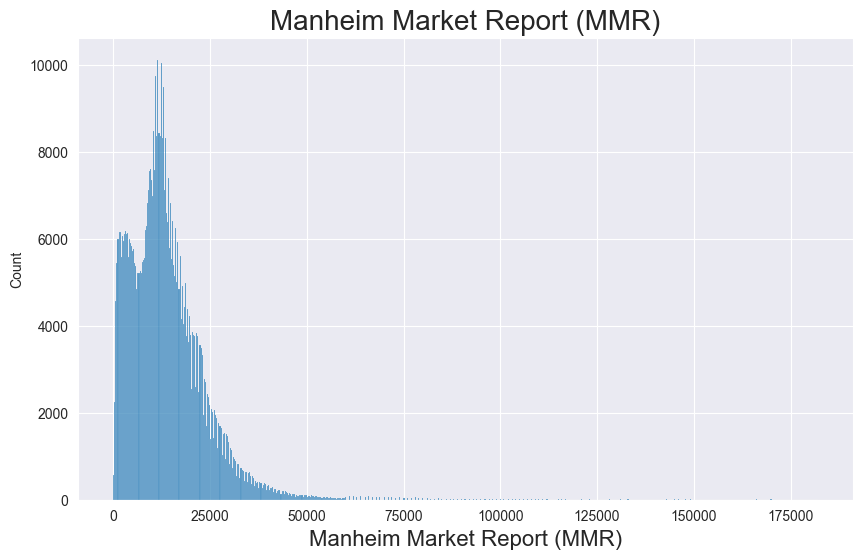

In [38]:
histo_plot("mmr", "Manheim Market Report (MMR)")

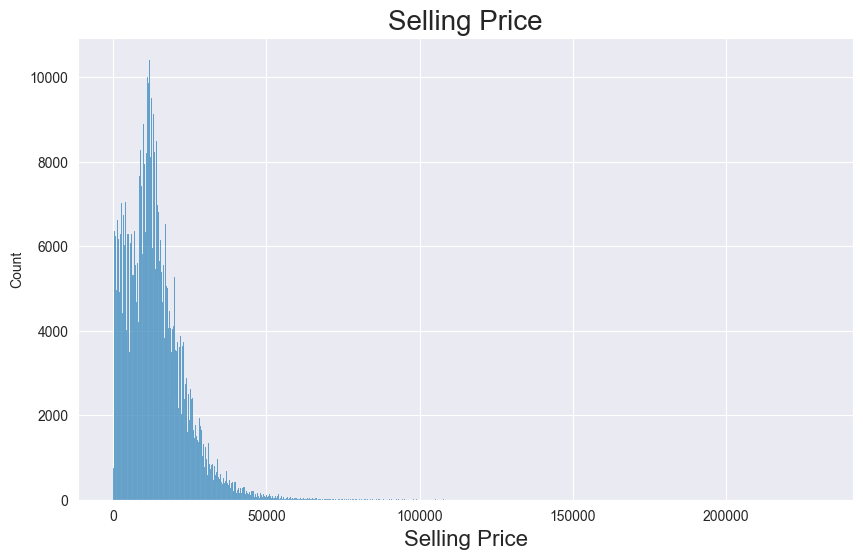

In [41]:
histo_plot("sellingprice", "Selling Price")

<Axes: >

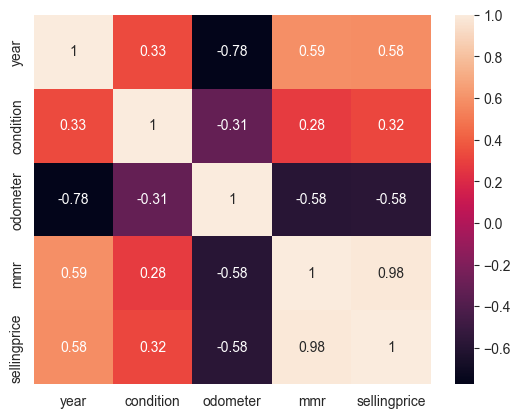

In [44]:
cat_col = ["make", "model", "trim", "body", "transmission", "vin", "state", "color", "interior", "seller"]
num_col = ["year", "condition", "odometer", "mmr", "sellingprice"]
sns.heatmap(df[num_col].corr(), annot=True)

In [45]:
df.groupby("make")[["sellingprice", "condition"]].mean().sort_values(by=["sellingprice", "condition"], ascending=False)

,sellingprice,condition
make,,
Rolls-Royce,153456.250000,37.000000
Ferrari,127210.526316,37.578947
Lamborghini,112625.000000,43.750000
Bentley,74349.130435,34.252174
Tesla,67054.347826,34.956522
Aston Martin,54812.000000,35.920000
Fisker,46461.111111,35.111111
Maserati,45632.442748,32.557252
Lotus,40800.000000,27.000000


Text(0, 0.5, 'Selling Price')

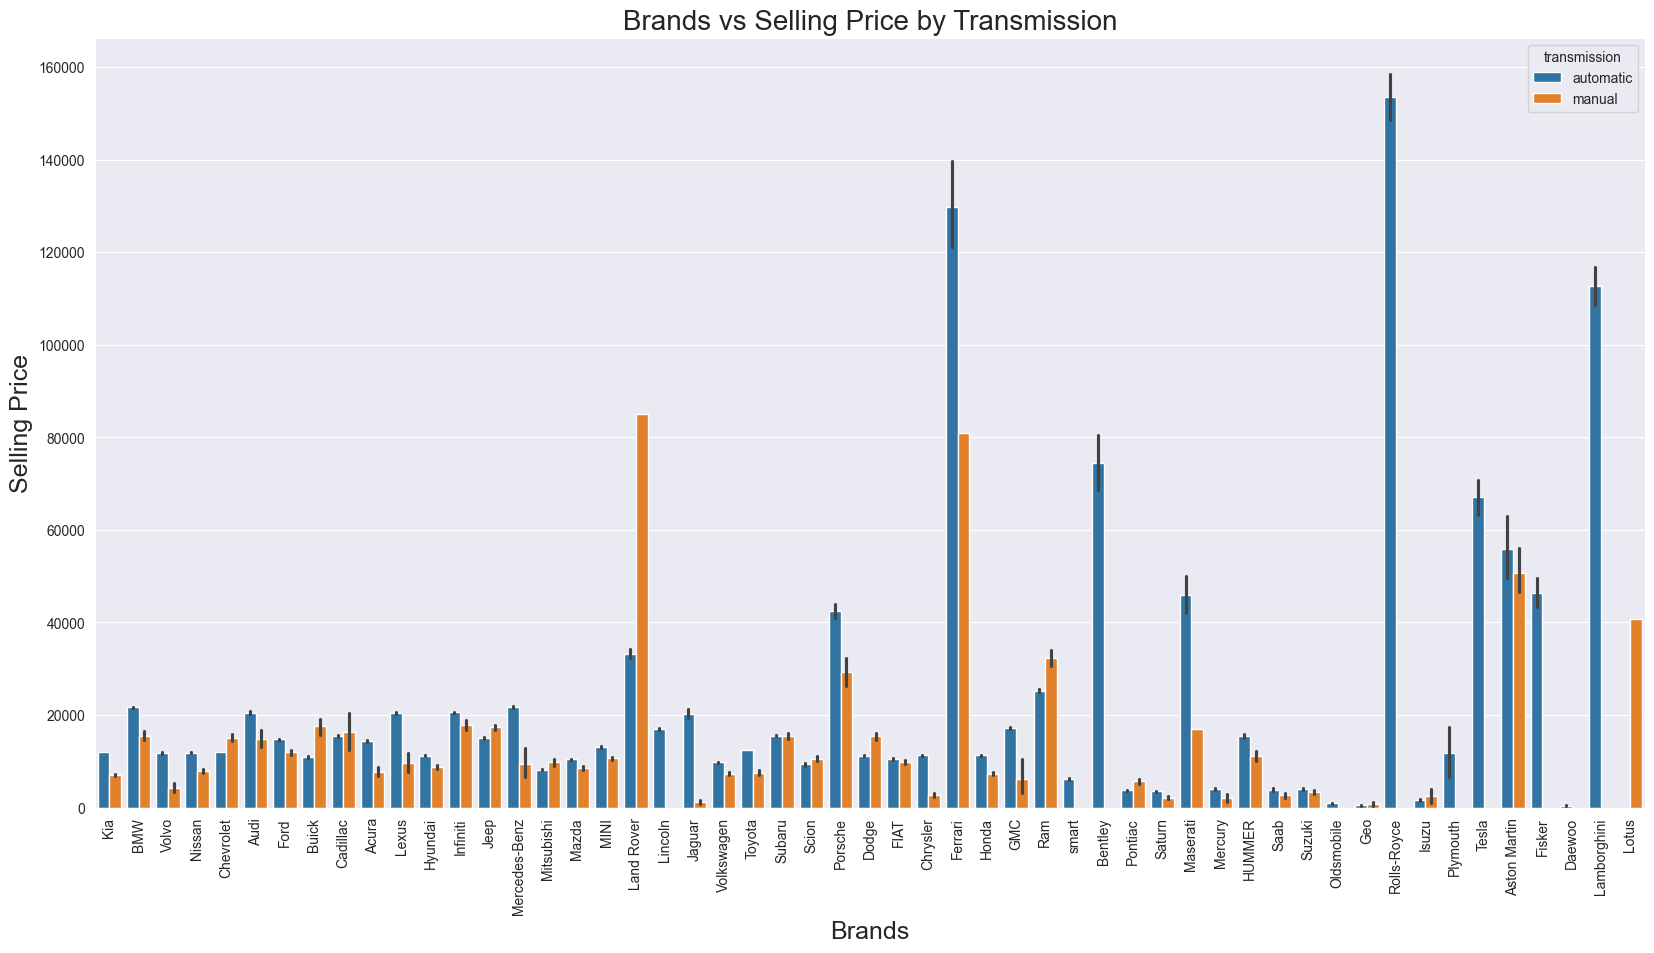

In [47]:
plt.figure(figsize=(20,10))
plt.title("Brands vs Selling Price by Transmission", fontsize=20)
sns.barplot(x=df["make"], y=df["sellingprice"], hue=df["transmission"])
plt.xlabel("Brands", fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Selling Price", fontsize=18)

Text(0, 0.5, 'MMR')

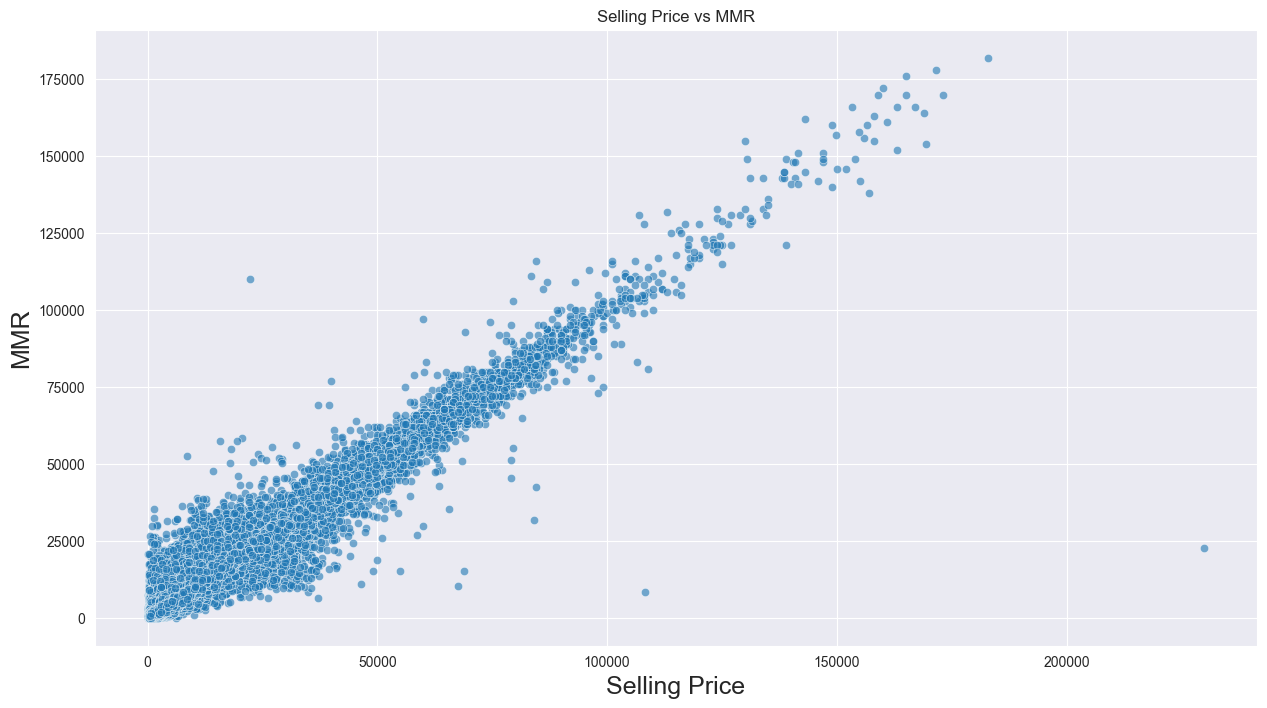

In [48]:
plt.figure(figsize=(15,8))
plt.title("Selling Price vs MMR")
sns.scatterplot(x=df["sellingprice"], y=df["mmr"], palette="magma", alpha=0.6)
plt.xlabel("Selling Price", fontsize=18)
plt.ylabel("MMR", fontsize=18)

Text(0, 0.5, 'MMR')

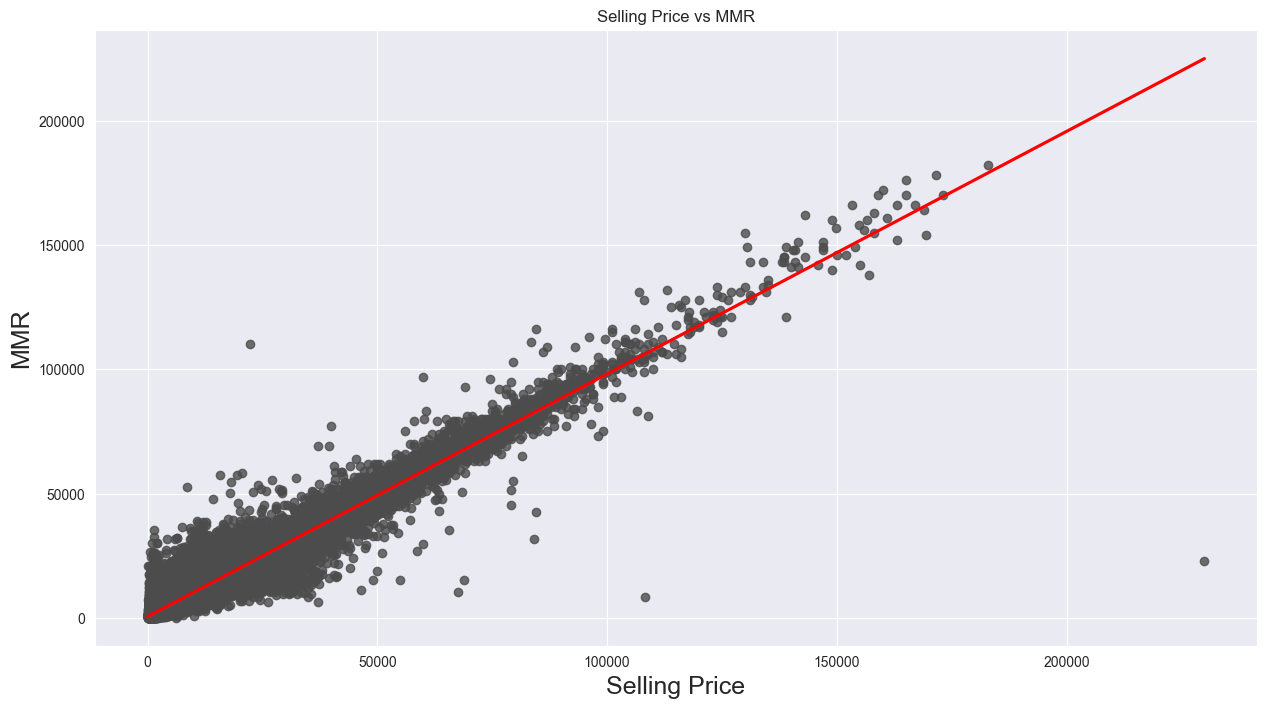

In [49]:
plt.figure(figsize=(15,8))
plt.title("Selling Price vs MMR")
sns.regplot(x=df["sellingprice"], y=df["mmr"], marker="o", color=".3", line_kws=dict(color="r"))
plt.xlabel("Selling Price", fontsize=18)
plt.ylabel("MMR", fontsize=18)

Text(0, 0.5, 'MMR')

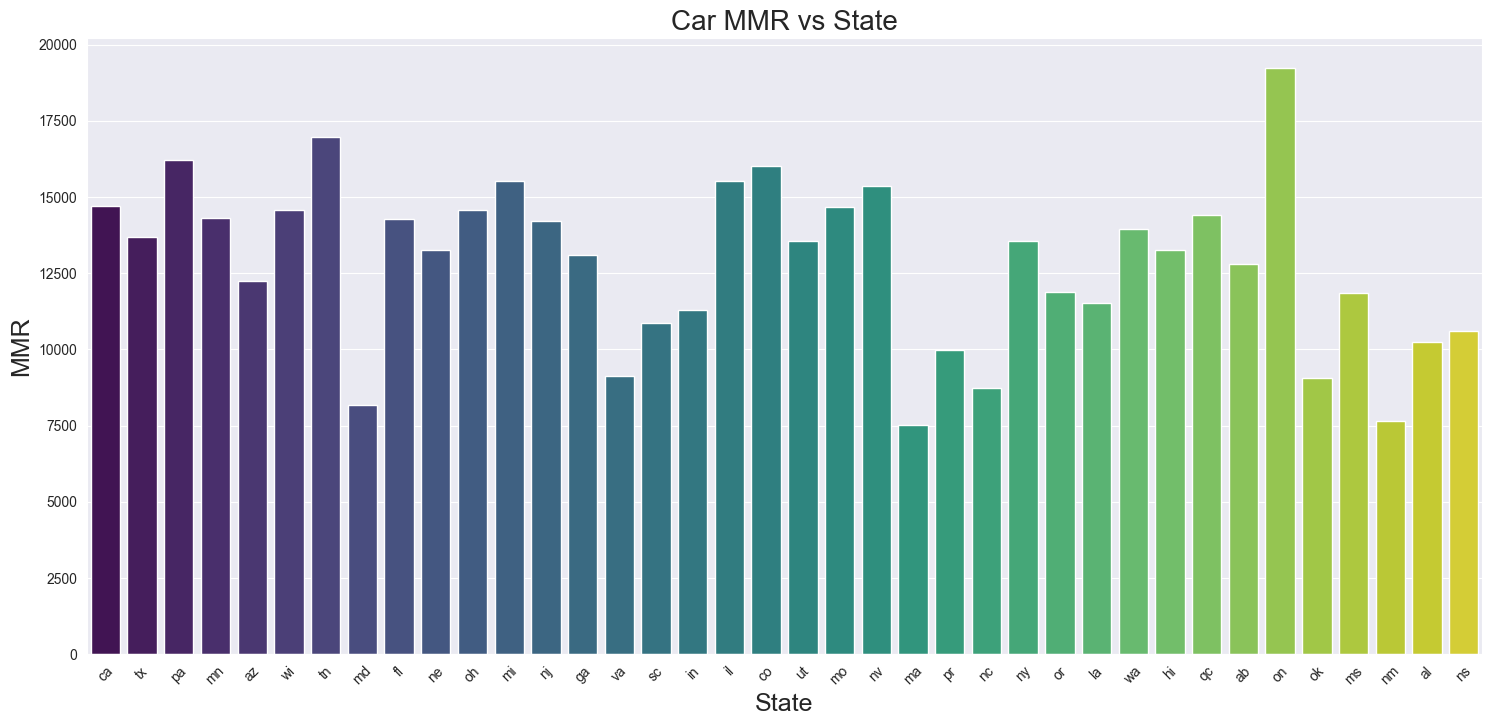

In [50]:
plt.figure(figsize=(18,8))
plt.title("Car MMR vs State", fontsize=20)
sns.barplot(x=df["state"], y=df["mmr"], errorbar=None, palette="viridis")
plt.xlabel("State", fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("MMR", fontsize=18)

Text(0, 0.5, 'Selling Price')

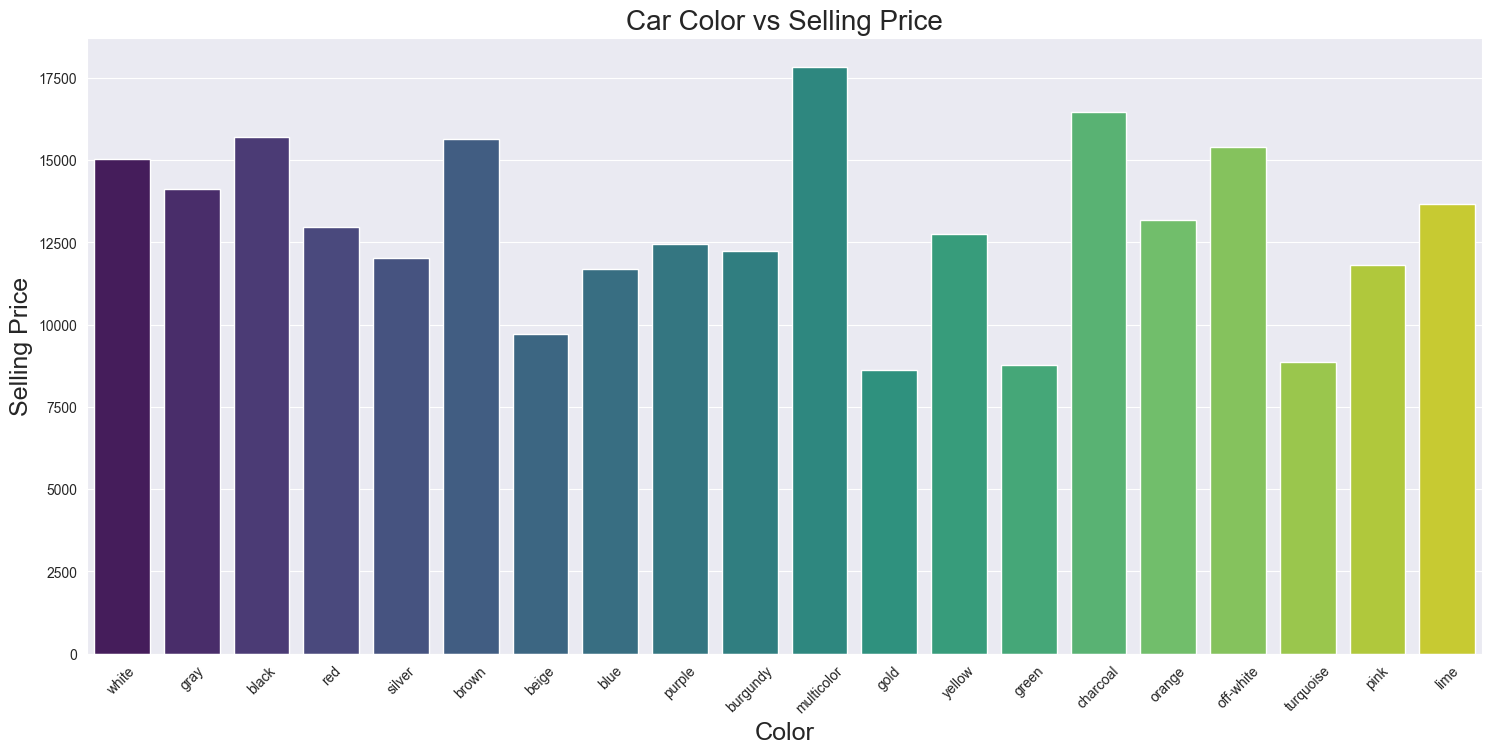

In [51]:
plt.figure(figsize=(18,8))
plt.title("Car Color vs Selling Price", fontsize=20)
sns.barplot(data=df, x="color", y="sellingprice", errorbar=None, palette="viridis")
plt.xlabel("Color", fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Selling Price", fontsize=18)

Text(0, 0.5, 'Selling Price')

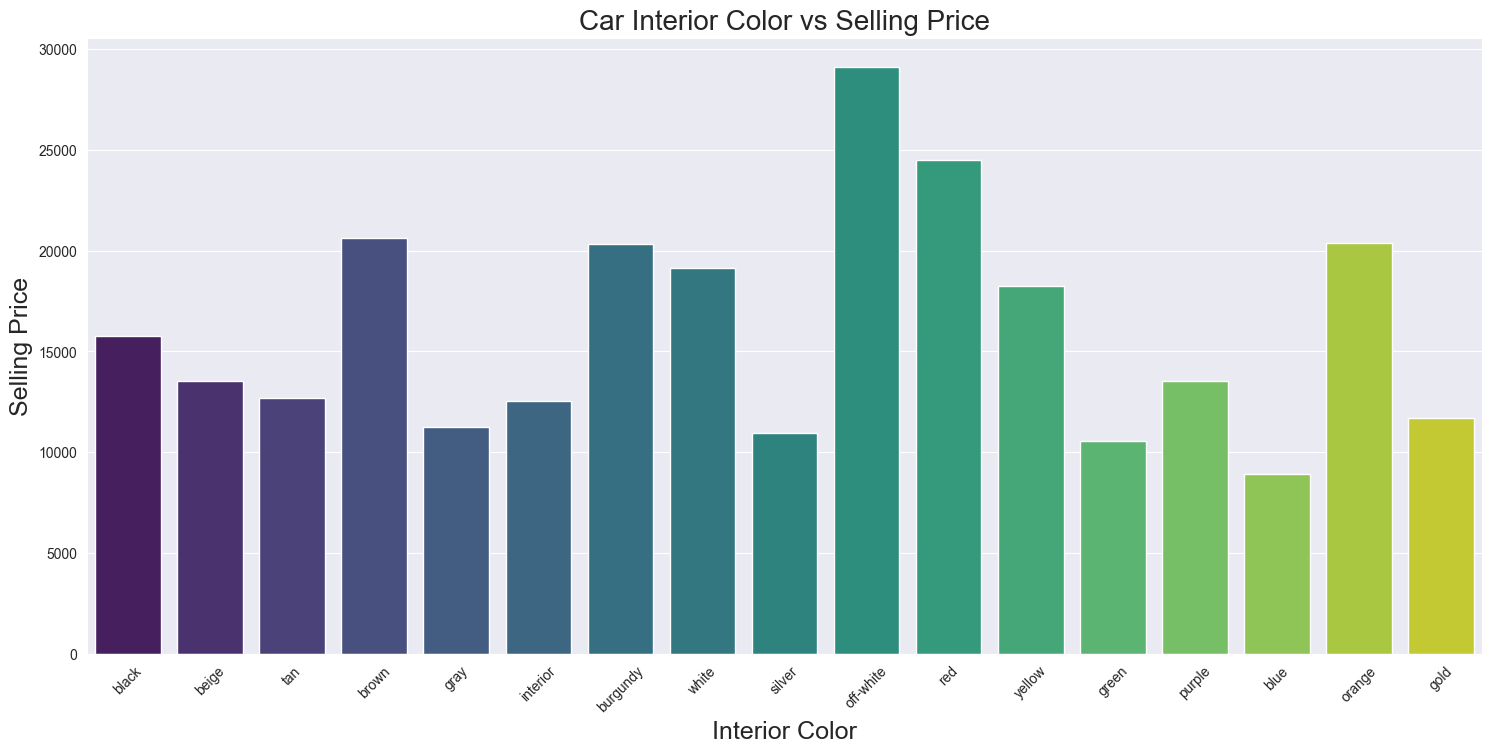

In [52]:
plt.figure(figsize=(18,8))
plt.title("Car Interior Color vs Selling Price", fontsize=20)
sns.barplot(data=df, x="interior", y="sellingprice", errorbar=None, palette="viridis")
plt.xlabel("Interior Color", fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Selling Price", fontsize=18)

Text(0, 0.5, 'Selling Price')

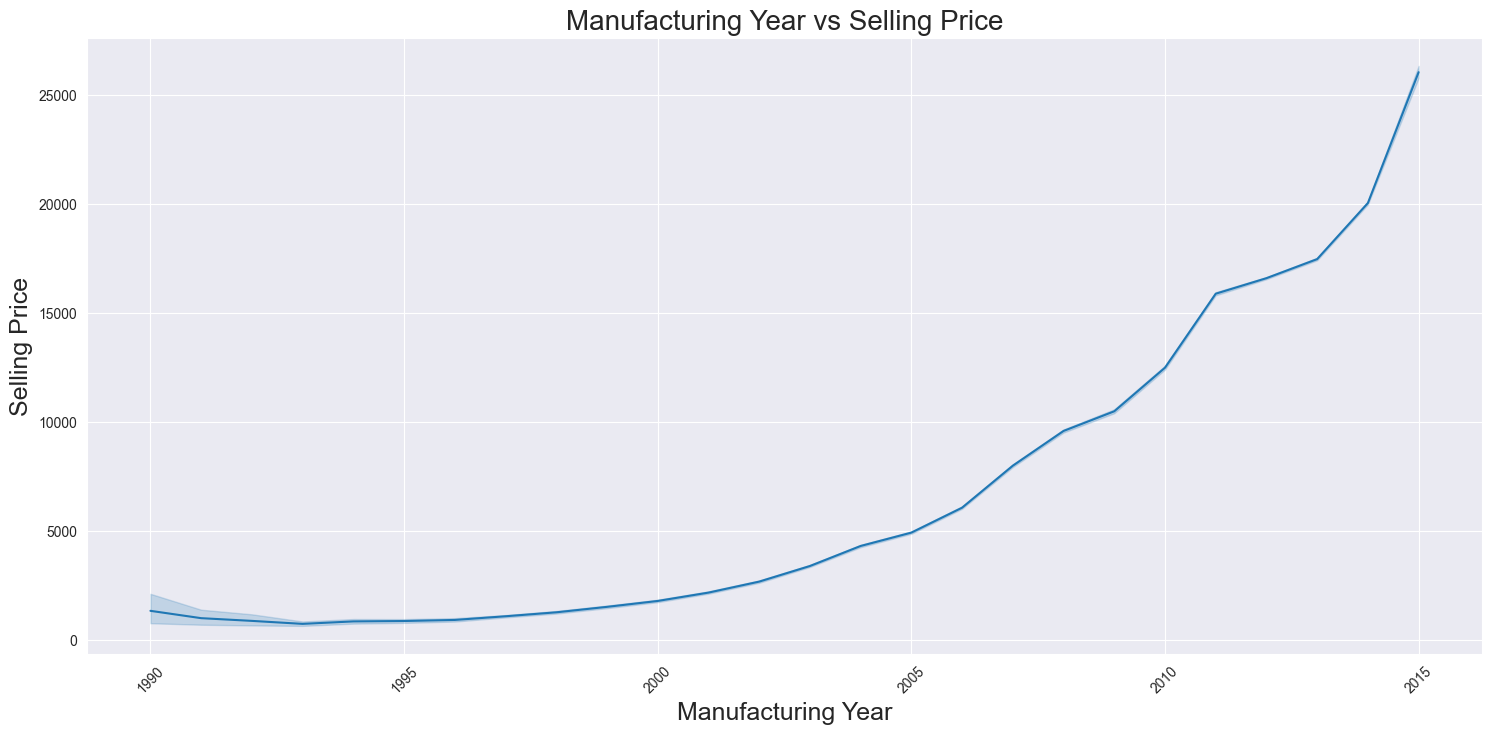

In [53]:
plt.figure(figsize=(18,8))
plt.title("Manufacturing Year vs Selling Price", fontsize=20)
sns.lineplot(x=df["year"], y=df["sellingprice"], palette="viridis")
plt.xlabel("Manufacturing Year", fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Selling Price", fontsize=18)

Text(0, 0.5, 'Selling Price')

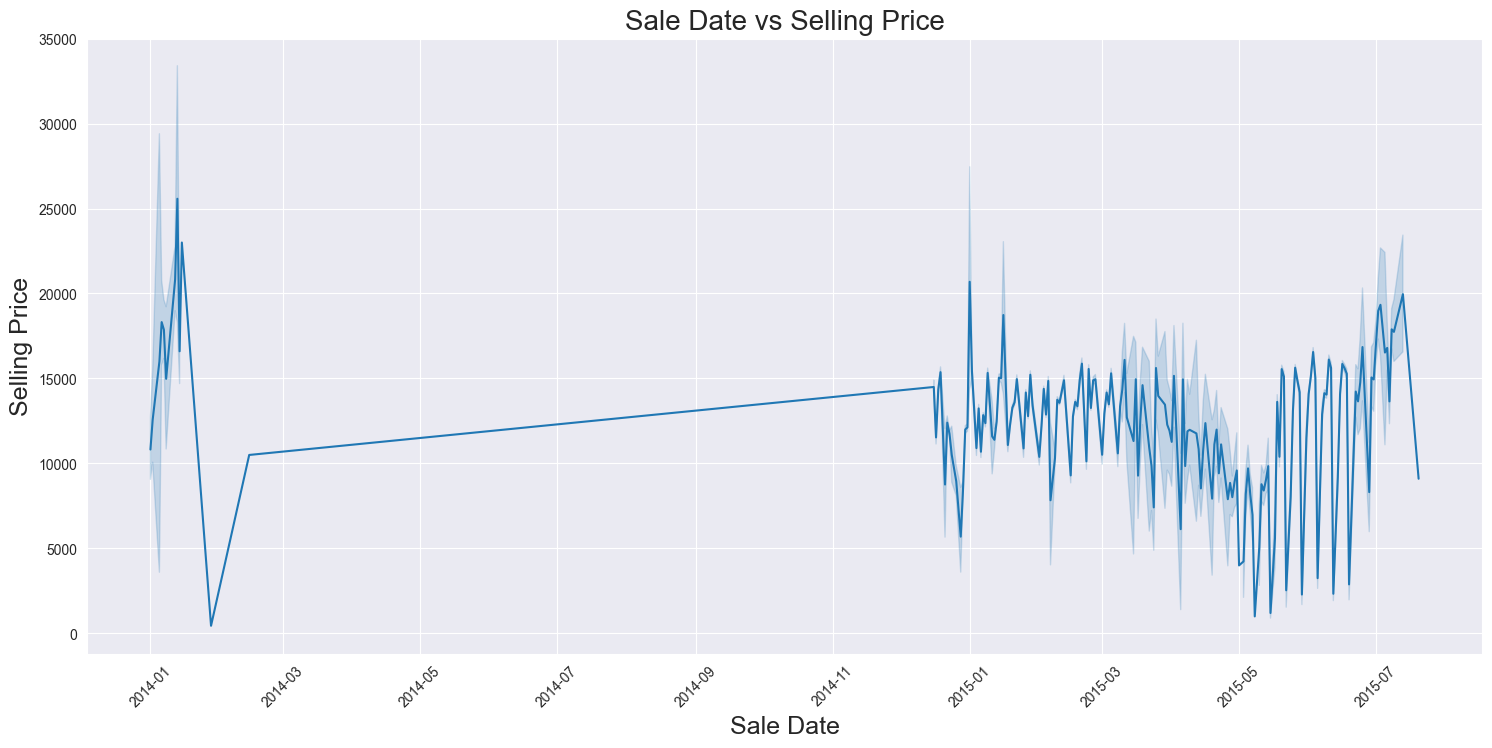

In [54]:
plt.figure(figsize=(18,8))
plt.title("Sale Date vs Selling Price", fontsize=20)
sns.lineplot(x=df["saledate"], y=df["sellingprice"], palette="viridis")
plt.xlabel("Sale Date", fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Selling Price", fontsize=18)

The Most Sold Car Models

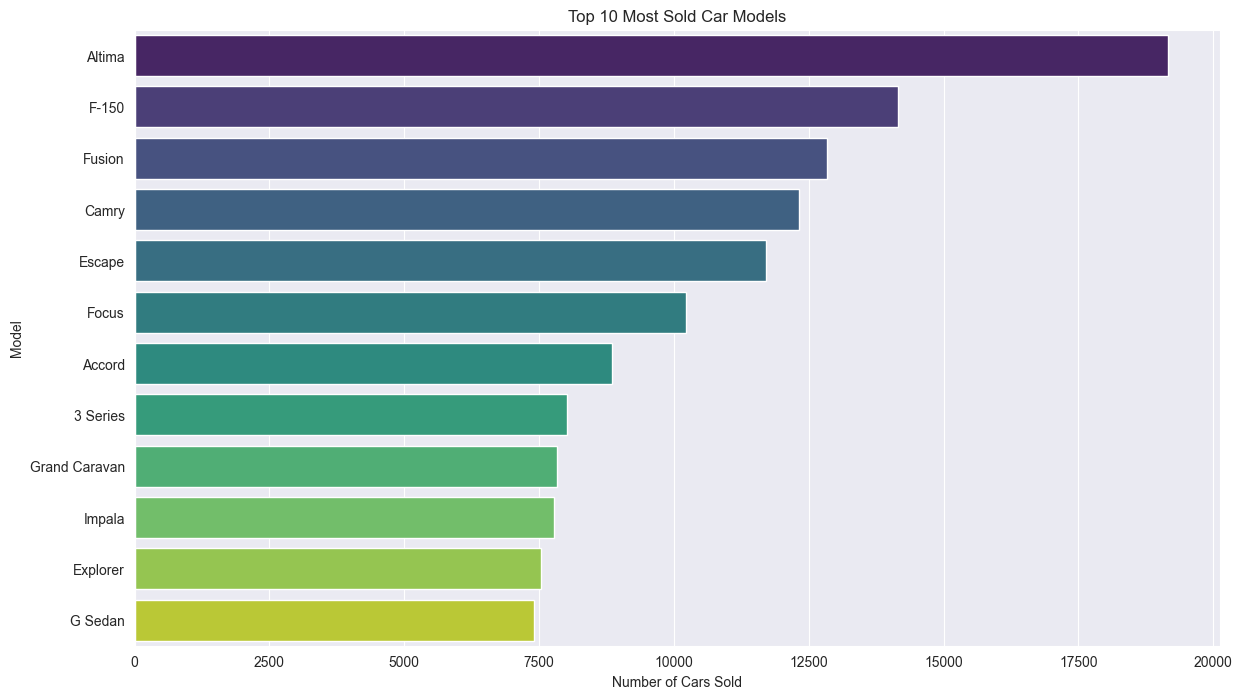

In [56]:
top_models = df["model"].value_counts().head(12)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_models.values, y=top_models.index, palette="viridis")
plt.title("Top 10 Most Sold Car Models")
plt.xlabel("Number of Cars Sold")
plt.ylabel("Model")
plt.show()

Companies with highest number of sales

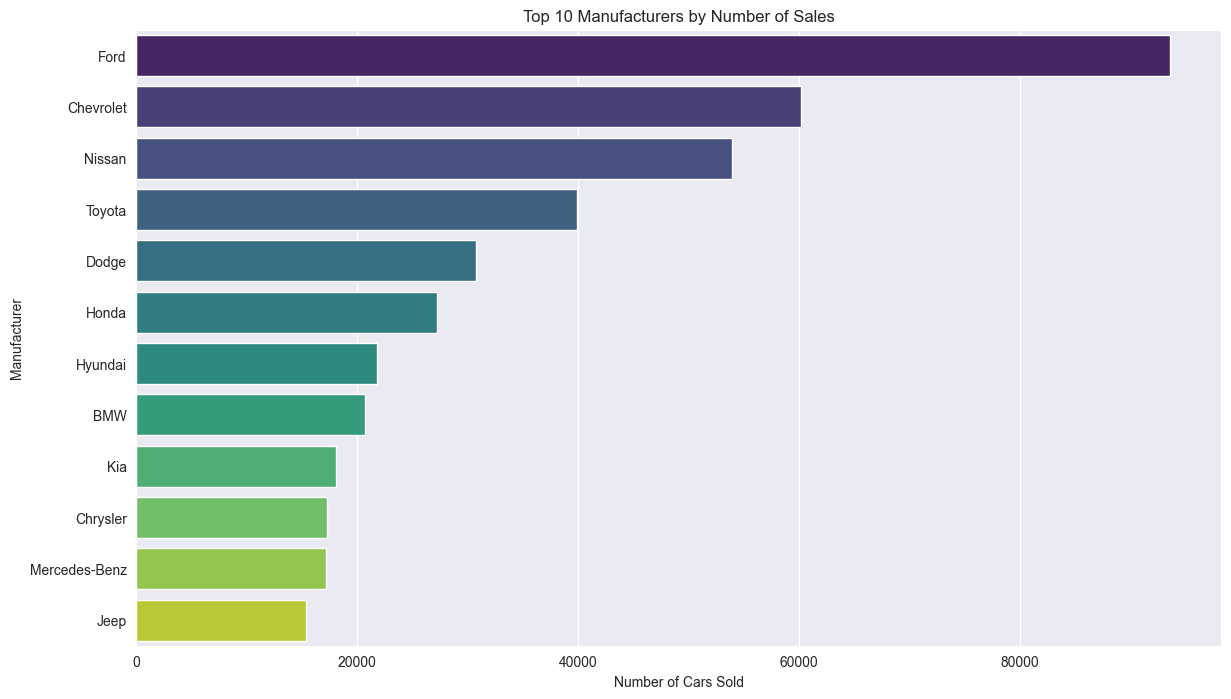

In [57]:
top_makes = data["make"].value_counts().head(12)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_makes.values, y=top_makes.index, palette="viridis")
plt.title("Top 10 Manufacturers by Number of Sales")
plt.xlabel("Number of Cars Sold")
plt.ylabel("Manufacturer")
plt.show()


The Distribution Of Car Selling Prices

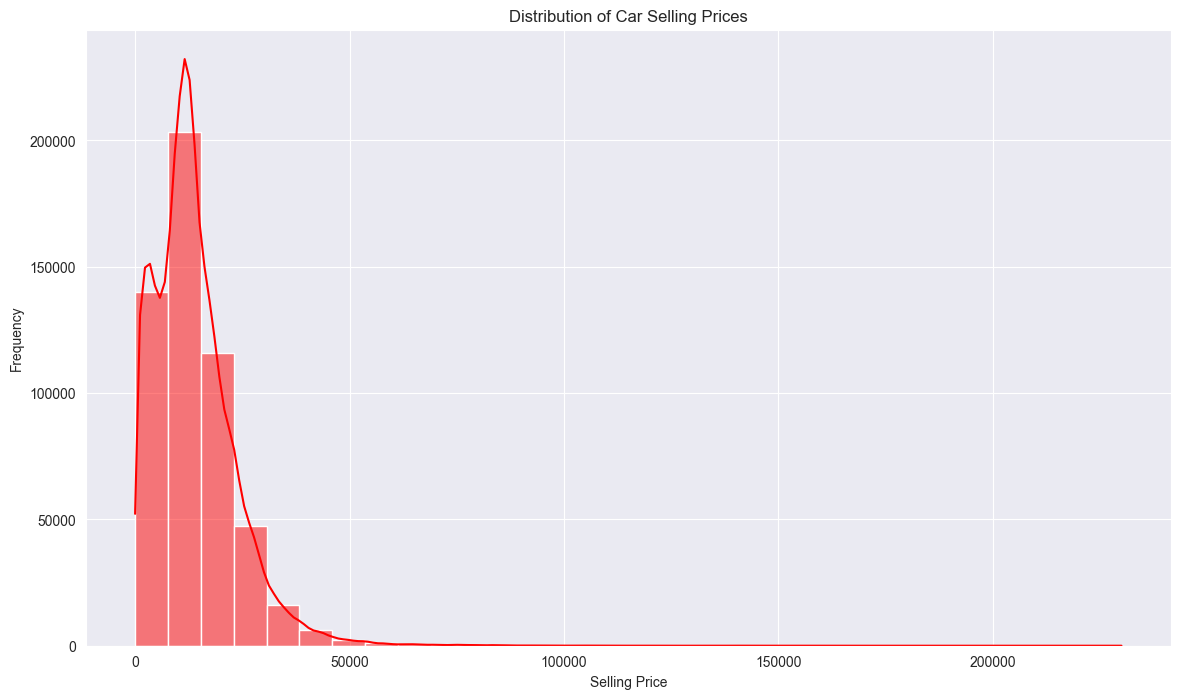

In [59]:
plt.figure(figsize=(14, 8))
sns.histplot(df["sellingprice"], kde=True, bins=30, color="red")
plt.title("Distribution of Car Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

FINAL REPORT

Upon importing the data, we initially have 558,837 rows and 16 columns. Of these, 5 columns are of integer type, while the remaining 11 are of string type.

Statistical analysis shows that the Manheim Market Report (MMR) and Selling Price values are quite similar. Although the maximum odometer reading of 999,999 is exceptionally high, it is not impossible.

Some cars in the dataset were manufactured as early as 1982, suggesting the presence of vintage cars.

There are numerous missing values in the dataset. The Transmission column has the highest proportion of missing values, about 13%. Other columns like Make, Model, Trim, Body, and Condition have 1%-2% missing values. The rest have less than 1% missing values.

The Year and Sale Date columns should be of datetime type, but they are currently in integer and string types, so we will convert them. The Condition column contains values like 45, 59, and 34, which is incorrect as it should have ratings between 1-5.

The 'Color' and 'Interior' columns have some entries marked as '-', which we replaced with 'Multicolor' to avoid adding more specific colors. The 'Body' column has inconsistencies such as variations in the case (e.g., 'Sedan' vs. 'sedan').

The top five brands by count are Ford, Chevrolet, Nissan, Toyota, and Dodge. Sedan and SUV are the two most common body types.

Automatic transmission is the most frequent, making the dataset imbalanced in terms of transmission types. Among various car colors, 'Black' and 'Grey' are the most common interior colors.

Florida and California each have over 70,000 cars, whereas other states have fewer than 50,000 cars. The manufacturing years range from 2000 to 2015, but there are outliers with manufacturing years of 1990 or earlier.

Most cars have a condition rating between 2 and 4, though some have ratings of 1 or 5. The maximum odometer reading is about 200,000, but there are extreme outliers, including some cars with readings as high as 999,999.

The MMR and Selling Price are quite similar, with a noticeable spike in cars priced between 10,000 and 20,000. Both price distributions are right-skewed.

The Sale Date ranges from 2015 to the last two months of 2014, with the first quarter of 2014 treated as an outlier. The correlation among columns ranges from -0.78 to 0.98, indicating some multicollinearity.

The average price of the most expensive car, a Rolls Royce, is 153,456.25, while the cheapest car, a Dodge, costs 450.00.

The selling price of automatic transmission cars is generally higher, except for brands like Land Rover and Lotus. Lotus does not have automatic transmission cars, while Rolls-Royce does not have manual transmission cars.

Scatterplots and regression plots show a strong correlation between MMR and Selling Price, though some data points deviate significantly. Car color and interior color have little impact on the Selling Price.

The distance traveled by a car negatively correlates with its selling price, but this relationship is not decisive. Cars manufactured after 2000 show an upward trend in selling prices. There is no clear trend between sale date and selling price, which appears to follow a random pattern.